# NTD Proposed Changes 2025-2026 Analysis

Proposed Change Text:

https://www.federalregister.gov/documents/2024/10/31/2024-25341/national-transit-database-proposed-reporting-changes-and-clarifications-for-report-years-2025-and


Task:
- As Caltrans DDS prepare to submit comments of these proposed changes to NTD, the Data Science branch is tasked to address 3 areas the proposed changes may affect the branch.
- Analysis of the following areas to be submitted to the Transit Quality Branch by 11/27/2024

In [1]:
import pandas as pd

from calitp_data_analysis.tables import tbls
import geopandas as gpd
from siuba import _, collect, count, filter, show_query
pd.set_option('display.max_colwidth', 100)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
from shared_utils import schedule_rt_utils

## Area 1 - NTD Reporting Streamlining
>E: The first is on the topic of NTD reporting streamlining. There are `a few items being proposed that may add additional reporting burden` and `some that propose to streamline things`. Is this an area that you all have an opinion on?
>
>K: will take a look based on our understanding of `common past reporting errors identified in the NTD Modernization project` and provide some comments. 
>
>E: That sounds great
>
>E: Overall would you say that the `increase in reporting burden would be worth it in terms of the data collected?` And on the converse would any `reductions in reporting burden cause a loss of data?`

### <u>Revisit the NTD Modernization - Issues Analysis</u>
Slalom completed an analysis of the most common erorrs in NTD reporting for 2020, 2021 and 2022 by frequency, type and agency. 

As reported, 3 issues account for ~25% of all errors:
>1. RR20F-005: The cost per hour changed by 30% or more. 
>2. A10-033: The number of General Purpose Maintenance Facilities differs from previous year. 
>3. RR20F-146: The miles per vehicle changed by 20% or more.

Slalom identified a list of the top 23 errors by frequency and most comments to determine which errors should be prioritized first.

sorted by issue ID:

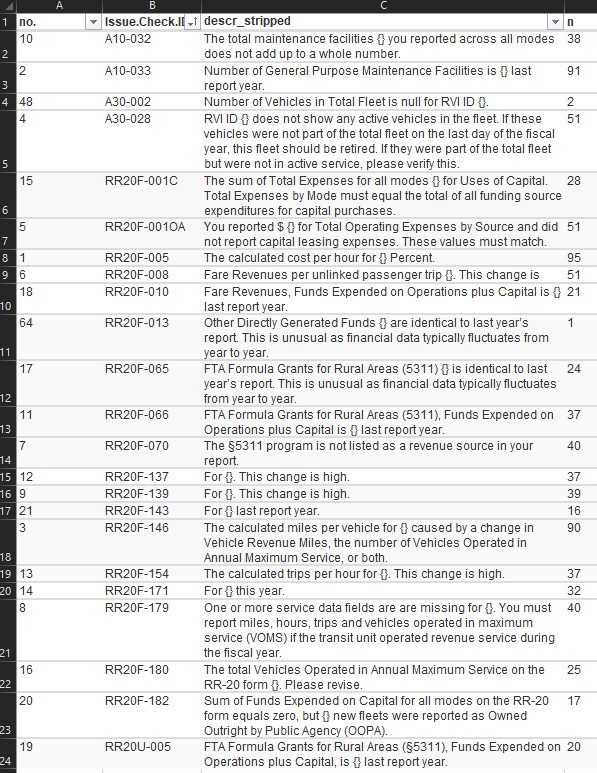
- 2x A10 errors
- 2x A30 errors
- 18x RR20F errors
- 1x RR20U errors

### <u>Notes from Proposed Changes document</u>

- **Sec B: increases reporting burden for all**
    - requires agencies to submit shapes.txt
    - align agency_id to NTD ID
    
- **Sec C: decreases reporting burden for all**
    - FTA acknowledges that the a15 and a10 is causing discrepanices
    - removes A-10 form
    - moves ADA data and other data from A-10 form to new extended A-15 form
    - clarifies what a "station" or "facility" is and how to count them for reporting
    - establish a standardize reporting method for passenger stations and facilities
    - **`Sec C directly relates to the issues analysis, A10 error was the 2nd more common error in reporting`**

- **Sec D: slight increase reporting burden for all**
    - proposes to add new categories to A-20 form:
    	1. “Track—Turntable,” 
		2. “Power and Signal—Pump Rooms”
        3. “Power and Signal—Fan Plants” 
    - Adds a "decade of construction" field to these category. this way FTA can more accurately capture an asset was reconstructed or renovated.

- **Sec E: may slightly increase reporting burden for some**
    - clarifies what counts as a cyber security event and adds more choices to better describe what type of event has happened
    - also expands what is IT infrastures and an heiarchy of events
    - I believe this reporting only applies IF the agency experiences a security event. So an agency who has not had any security events, will not have an increased reporting burden

- **Sec F: may slightly increase reporting burden for some**
    - revise the NTD major event reporting requirements to capture the new “disabling damage” event category
    - similar to Sec e, only applies if a safety event occurs

- **Sec G: decreases reporting burden for some**
    - there are some unique rural operators that operate in multiple, small areas, but have the full reporter status
    - proposes that these unique operators get a waiver to turn them into reduced reporters
    - FTA estimates this affects 10-15 agencies.

- **Sec H: may significantly increase reporting burden for some**
    - propose to have a new category in NTD reporting field to allow transit agencies to declare if they are a voluntary reporter or not
    - if a transit agency decides to become a voluntary reporter, they must complete the NTD report in its entirety. 
    - These reporters voluntarily comply with all NTD reporting requirements under the NTD rule (49 CFR Part 630) and the USOA.

## <u>Comments for Area 1</u>
Regarding the possible affects on the Data Science Branch, we have the biggest interest in Sections C and G as it affects NTD metrics we typically use in analyses.

Slalom conducted an analysis that looked into the types of reporting errors Caltrans received from NTD for 3 reporting years. The analysis found that Form A-10 errors were quite common. Section C of the proposed changes state that FTA is also awear of the issues in the A-10 and A-15 form. The proposed changes eliminates the A-10 entirely and moves some of the initial A-10 metrics over to a new, extended A-15 form. This change aims to reduce the reporting burden for transit agencies.

Sections G concerns changing rural operators with full reporter responsibilities to be reduced reporters. FTA aims to decrease the reporting burden, but this change affects an estimated 10-15 operators. going from full reporter to reduced reporters would mean the operator does not need to report data related to passenger miles or monthly service or safety stats

Section H proposes a change to the NTD reporting platform to include a field that identify Voluntary reporters. This slightly increases the reporting burden for all NTD reporters. Sections E and F may conditionally increase the reporting burden for some operators, if the operator experiences cyber security or safety events. Finally, Section D slightly incresses the reporting burden by proposing new categories in to A-20 form.

Overall, the Data Science Branch support the proposed changes. The potential increae in reporting burden under sections B, E, F and H are a worth it for the decreae in reporting burden in section C. The data Science Branch does not think any data would be lost in section C, as the initial metics in the A-10 will move to the new A-15 form.

Section G, may have a significant impact but will depend on which operators meet ALL the criteria to be a reduced reporter. See next section for more analysis on section G.


---

## Area 2 - Rural, Full Reporters to Reduced Reporters
> E: The second area is on the topic of NTD data coming through as a result of a `potential reduction in some full reporters in rural areas`. I’m not sure which ones these would be because the rulemaking wouldn’t affect all reporters. I’m also `not sure what data wouldn’t be reported as a result`. Is this something the analyst team can look into further… ie see if the proposed change in Section G would affect any California agencies and what data we may not receive from NTD as a result.
>
> K: `identify which CA agencies are full reporters in rural areas that meet the criteria in section G`, although I think we’d do it based on `2023 NTD data` and FTA would do it on 2024 data. I am not sure if there would be data loss based on FTA’s assessment that these agencies were historically Rural reporters.
>
> E: 2.	Yeah, I’m not expecting there would be much impact here, but perhaps it `could affect something like Fresno County` or something that provides a lot of rural service, but is large enough to be a full reporter. It’s worth flagging and understanding if it could be an impact or not. 
>
>E: did you analysis conclude that as many as 26 agencies potentially no longer show up in monthly reports?

### <u>Understanding the difference between urban Full Reporters and urban Reduced Reporters</u>

Per NTD reporting manual
>Full Reporters must provide the Annual Report, as well as Monthly Ridership (MR) and monthly Safety and Security reports. All other reporter types file their reports on an annual basis.

>Full Reporters must report data for total revenues earned during the fiscal year. Reduced Reporters only report operating and capital expenditures incurred in the fiscal year, by source of revenue.

**List of form used by both Urban Full and Reduced Reporters:**
1. Basic Information (Form P-10)
2. Modes and Types of Service (Form P-20)
3. Reporter Users (Form P-30)
4. General Transit Feed Specification Data for Fixed Route Modes (Form P-50)
5. Identification (Form B-10)
6. Geospatial Data for Demand Response Modes (Form B-15)
7. Contractual Relationship Data Requirements (Form B-30)
8. Transit Asset Management Performance Measure Targets (Form A-90)
9. Stations and Maintenance Facilities (Form A-10)
10. Transit Asset Management Facilities Inventory (Form A-15)
11. Revenue Vehicle Inventory (Form A-30)
12. Service Vehicle Inventory (Form A-35)
13. Reporting Federal Funding Allocation Data (Form FFA-10)
14. CEO Certification (Form D-10)


**List of unique forms for Urban Full Reporters:**
1. Reportable Segments (Form P-40)
2. Funding Sources (Form F-10)
3. Capital Expenses (Form F-20)
4. Operating Expenses: Uniform System of Accounts Functions and Object Classes (Form F-30)
5. Operating Expenses: Uniform System of Accounts Object Classes — Reconciling Items (Form F-40)
6. Uniform System of Accounts Object Classes: Financial Statement (Form F-60)
7. Monthly Ridership Reporting (Form MR-20)
8. Weekly Reference Reporting (Form WE-20)
9. Transit Way Mileage (Form A-20)
10. Employees (Form R-10)
11. Maintenance Performance (Form R-20)


**List of unique forms for Urban Reduced Reporters:**
1. S&S-60 Safety Data Form
2. Reduced Reporting Form (Form RR-20)
3. Transit Asset Management Performance Measure Targets (Form A-90)
---


### FTAs proposed solution for these rural operator, full reporters

>FTA proposes a waiver process in which reporters that predominantly serve rural areas may request an exemption from filing as a Full Reporter. Effectively, this would mean that operators receiving the waiver would report as Reduced Reporters instead.
>
>FTA proposes to use data from the most recent year's validated and accepted data to evaluate eligibility for this waiver, and FTA would grant the waiver if each of the above criteria are met. Based on current available data, **FTA estimates that approximately 10-15 agencies would be eligible for this waiver.**
>
>FTA would automatically identify agencies that qualify for this waiver ... All eligible reporters then would be presented with the option to request the waiver annually during the Report Year Kick-Off (RYKO) process



## <u>Comments for Area 2</u>

If an operator, under this proposed change, goes from Full to Reduced reporter, we can expect to miss data from 11 forms. However, those unique forms dont look familar in the ntd validation report pipeline so im unsure what kind of impact the data science branch would see.

Will need to see if theres equivilant forms between Full and Reduced reporters that report similar data but in different forms.

FTA's method for presenting elibible reporters of the waiver process seem a little unclear. I assume FTA will notify only the reporters that meet all the criteria in section G, and NOT all reporters. Notifying all reporters of a possible waiver they might not be eligible for would cause a lot of confusion.

### <u>Query the warehouse to get find all the reporters that meet Sec G criteria</u>

Sec G criteria:
- Receives funding under 49 U.S.C. `5311`,
- Reports `one or more` primary or secondary `UZA`s on their Federal Funding Allocation form (`FFA-10`),
- Operates `more than 30` Vehicles Operated in Maximum Service (`VOMS`),
- Operates `fewer total VOMS in urbanized areas (UZAs)` than `rural (non-UZA) areas`, and
- Allocates `more total Vehicle Revenue Miles (VRM) to non-UZAs` than `UZAs`.


#### dim_annual_funding_sources
- for 5311 agencies (rural operators)
- Also has UZA and VOMS

In [ ]:
# Has 5311 data for operators, and UZA, VOMS, 
ntd_funding_sources = (tbls.mart_ntd.dim_annual_funding_sources()
                    >> filter(_.report_year == "2023",
                              _.fta_rural_progam_5311 > 0,
                              _.reporter_type == "Full Reporter",
                              _.primary_uza_code is not None
                             )
                    >> collect()
                   )

keep_cols_0=[
    "funding_source",
    "agency",
    "agency_voms",
    "fta_rural_progam_5311",
    "ntd_id",
    "organization_type",
    "primary_uza_population",
    "report_year",
    "reporter_type",
    "primary_uza_code",
    "primary_uza_name"
]

ntd_funding_sources = ntd_funding_sources[keep_cols_0]
ntd_funding_sources.info()

#### dim_annual_service_agencies
- for UZA, VOMS and VRM

In [ ]:
# Has UZA, VRM and  VOMS. 

ntd_service_agencies = (tbls.mart_ntd.dim_annual_service_agencies ()
                    >> filter(_.report_year == "2023",
                              _.agency_voms > 30,
                              _.state == "CA",
                              _.primary_uza_code is not None
                             )
                    >> collect()
                   )

keep_col_1 =[
    "key",
    "report_year",
    "ntd_id",
    "agency",
    "reporter_type",
    "organization_type",
    "city",
    "state",
    "agency_voms",
    "primary_uza_code",
    "primary_uza_name",
    "primary_uza_population",
    "actual_vehicles_passenger_car_revenue_miles"
]

ntd_service_agencies = ntd_service_agencies[keep_col_1]

ntd_service_agencies.info()

#### Merge dataframes to get 5311 agencies in CA with >30 VOMS with UZA names

In [ ]:
on_list =[
    "report_year",
    "agency",
    "reporter_type",
    "organization_type",
    "organization_type",
    "agency_voms",
    "primary_uza_name",
    "ntd_id",
    "primary_uza_population"
]
merge = ntd_service_agencies.merge(
    ntd_funding_sources, 
    how="inner", 
    on= on_list, 
    indicator=True )

In [ ]:
merge.info()

#### Who are the agencies that match Section G Critera?

In [ ]:
merge["agency"].value_counts()

In [ ]:
merge

In [ ]:
# Export to GCS
#merge.to_csv("gs://calitp-analytics-data/data-analyses/ntd/proposed_changes_agencies.csv")

# <u>TBD</u>
- get UZA geometry data
- get list of bus stop point locations for the agencies identified above
- overlay bus stop point location on UZA geometry to find stops that are outside of the UZA for an agency to help answer
>- Operates fewer total VOMS in urbanized areas (UZAs) than rural (non-UZA) areas, and
>- Allocates more total Vehicle Revenue Miles (VRM) to non-UZAs than UZAs.

### get UZA geojson data from FTA rest server

In [ ]:
#rest_server_link = "https://services.arcgis.com/xOi1kZaI0eWDREZv/ArcGIS/rest/services/FTA_Administrative_Boundaries/FeatureServer/5/query?where=1%3D1&objectIds=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&relationParam=&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&returnEnvelope=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&defaultSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&collation=&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnTrueCurves=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token="

In [ ]:
#uza_data = gpd.read_file(rest_server_link)

#### get CA UZAs

In [ ]:
#ca_uza = uza_data[uza_data['NAMELSAD'].str.contains(", CA")].reset_index(drop=True)

In [ ]:
#ca_uza.to_parquet("gs://calitp-analytics-data/data-analyses/ntd/proposed_changes_ca_uza.parquet")

In [3]:
ca_uza = gpd.read_parquet("gs://calitp-analytics-data/data-analyses/ntd/proposed_changes_ca_uza.parquet")

In [4]:
ca_uza = ca_uza.to_crs("EPSG:2229")

In [ ]:
display(
    ca_uza.info(),
    ca_uza.crs
)

<AxesSubplot:>

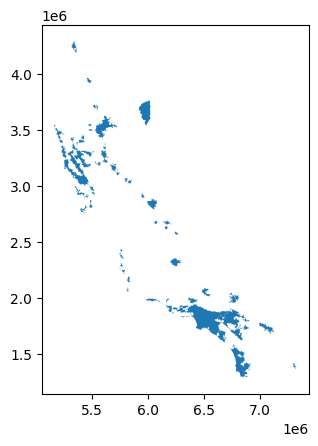

In [6]:
ca_uza.plot()

#### get stop location of all operators matching the criteria


In [7]:
# read in section g operators
sec_g_ops = pd.read_csv("gs://calitp-analytics-data/data-analyses/ntd/proposed_changes_agencies.csv")

In [8]:
sec_g_ntd_id = list(sec_g_ops["ntd_id"].unique().astype("str"))

len(sec_g_ntd_id)

26

## Mimic what i did in Metabase

- dim org-to-dim providers gtfs data on key - org key
- results-to- dim gtfs datasets on schedule gtfs dataset key - key
- results-to-dim stops on base64url


In [188]:
# try this

stops = pd.read_parquet("gs://calitp-analytics-data/data-analyses/rt_delay/compiled_cached_views/stops_2024-10-16.parquet")

stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88941 entries, 0 to 88940
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   feed_key                              88941 non-null  object        
 1   service_date                          88941 non-null  object        
 2   feed_timezone                         88941 non-null  object        
 3   first_stop_arrival_datetime_pacific   84541 non-null  datetime64[ns]
 4   last_stop_departure_datetime_pacific  84541 non-null  datetime64[ns]
 5   stop_id                               88941 non-null  object        
 6   stop_key                              88941 non-null  object        
 7   stop_name                             88941 non-null  object        
 8   stop_event_count                      88941 non-null  int64         
 9   route_type_0                          757 non-null    float64       
 10

In [189]:
crosswalk = pd.read_parquet("gs://calitp-analytics-data/data-analyses/gtfs_schedule/crosswalk/gtfs_key_organization_2024-10-16.parquet")

crosswalk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 214
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   schedule_gtfs_dataset_key          215 non-null    object 
 1   name                               215 non-null    object 
 2   schedule_source_record_id          215 non-null    object 
 3   base64_url                         215 non-null    object 
 4   organization_source_record_id      215 non-null    object 
 5   organization_name                  215 non-null    object 
 6   itp_id                             203 non-null    float64
 7   caltrans_district                  215 non-null    object 
 8   counties_served                    121 non-null    object 
 9   hq_city                            160 non-null    object 
 10  hq_county                          123 non-null    object 
 11  is_public_entity                   123 non-null    object 

In [190]:
crosswalk.head()

,schedule_gtfs_dataset_key,name,schedule_source_record_id,base64_url,organization_source_record_id,organization_name,itp_id,caltrans_district,counties_served,hq_city,hq_county,is_public_entity,is_publicly_operating,funding_sources,on_demand_vehicles_at_max_service,vehicles_at_max_service,number_of_state_counties,uza_name,density,number_of_counties_with_service,state_admin_funds_expended,service_area_sq_miles,population,service_area_pop,subrecipient_type,primary_uza,reporter_type,organization_type,voms_pt,voms_do,year
0,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,reckQmUdXUzHFmlVf,City of Ojai,231.0,07 - Los Angeles,None,Ojai,None,None,None,None,2,2,<NA>,None,NaN,<NA>,NaN,<NA>,NaN,<NA>,Rural General Public Transit,None,Rural Reporter,County or Local Government Unit or Department of Transportation,<NA>,2,2022
1,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,rec7EN71rsZxDFxZd,Ventura County Transportation Commission,380.0,07 - Los Angeles,Santa Clara;Ventura,Camarillo,Ventura,True,True,5307;5311;5339,<NA>,45,<NA>,"Oxnard--San Buenaventura (Ventura), CA",4910.0,<NA>,NaN,28,376117.0,209877,None,None,Full Reporter,Public Agency or Authority of Transit Service,45,<NA>,2022
2,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,recS7GnKTcQVX20HE,Gold Coast Transit District,123.0,07 - Los Angeles,Ventura,Oxnard,Ventura,True,True,5307;5310;5339,49,71,<NA>,"Oxnard--San Buenaventura (Ventura), CA",4910.0,<NA>,NaN,84,376117.0,374827,None,None,Full Reporter,Public Agency or Authority of Transit Service,22,49,2022
3,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,rec1ErIn9gG1Isk5W,City of Simi Valley,308.0,07 - Los Angeles,Ventura,Simi Valley,Ventura,True,True,5307,17,17,<NA>,"Simi Valley, CA",4027.0,<NA>,NaN,50,127364.0,126356,None,None,Reduced Reporter,County or Local Government Unit or Department of Transportation,<NA>,17,2022
4,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,recojKzQsBzE1hjVu,City of Moorpark,210.0,07 - Los Angeles,Ventura,None,Ventura,True,True,5307,<NA>,2,<NA>,"Thousand Oaks, CA",2668.0,<NA>,NaN,12,213986.0,35975,None,None,Reduced Reporter,County or Local Government Unit or Department of Transportation,2,<NA>,2022


In [61]:
# dim orgs
dim_orgs = (tbls.mart_transit_database.dim_organizations()
            >> filter(_._is_current == True,
                      _.ntd_id.isin(sec_g_ntd_id),
                      _.public_currently_operating_fixed_route == True
                     )
            >> collect()
           )
                   

keep_cols_2 =[
    "key",
    "source_record_id",
    "name",
    "organization_type",
    "caltrans_district",
    "reporting_category",
    "is_public_entity",
    "ntd_id",
    "reporting_category",
    "public_currently_operating_fixed_route",  
]

dim_orgs =dim_orgs[keep_cols_2]
dim_orgs.rename(columns={
    "key":"key_orgs",
    "name":"name_orgs"
}, inplace=True)
dim_orgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   key_orgs                                26 non-null     object
 1   source_record_id                        26 non-null     object
 2   name_orgs                               26 non-null     object
 3   organization_type                       26 non-null     object
 4   caltrans_district                       26 non-null     object
 5   reporting_category                      26 non-null     object
 6   is_public_entity                        26 non-null     bool  
 7   ntd_id                                  26 non-null     object
 8   reporting_category                      26 non-null     object
 9   public_currently_operating_fixed_route  26 non-null     bool  
dtypes: bool(2), object(8)
memory usage: 1.8+ KB


In [193]:
dim_orgs_to_crosswalk = dim_orgs.merge(crosswalk, left_on="source_record_id", right_on="organization_source_record_id", how="left")

dim_orgs_to_crosswalk.info() # 31 feeds, operators can have multile scheduele feeds, try to merge in the stops parquet,

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   key_orgs                                31 non-null     object 
 1   source_record_id                        31 non-null     object 
 2   name_orgs                               31 non-null     object 
 3   organization_type_x                     31 non-null     object 
 4   caltrans_district_x                     31 non-null     object 
 5   reporting_category                      31 non-null     object 
 6   is_public_entity_x                      31 non-null     bool   
 7   ntd_id                                  31 non-null     object 
 8   reporting_category                      31 non-null     object 
 9   public_currently_operating_fixed_route  31 non-null     bool   
 10  schedule_gtfs_dataset_key               31 non-null     object 


In [ ]:
dim_orgs_to_crosswalk.sort_values(by="organization_name")

In [192]:
stops.columns

Index(['feed_key', 'service_date', 'feed_timezone',
       'first_stop_arrival_datetime_pacific',
       'last_stop_departure_datetime_pacific', 'stop_id', 'stop_key',
       'stop_name', 'stop_event_count', 'route_type_0', 'route_type_1',
       'route_type_2', 'route_type_3', 'route_type_4', 'route_type_5',
       'route_type_6', 'route_type_7', 'route_type_11', 'route_type_12',
       'missing_route_type', 'geometry'],
      dtype='object')

In [194]:
merge_test_again = dim_orgs_to_crosswalk.merge(stops, left_on = "schedule_source_record_id", right_on="feed_key", how="left")

merge_test_again.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   key_orgs                                31 non-null     object        
 1   source_record_id                        31 non-null     object        
 2   name_orgs                               31 non-null     object        
 3   organization_type_x                     31 non-null     object        
 4   caltrans_district_x                     31 non-null     object        
 5   reporting_category                      31 non-null     object        
 6   is_public_entity_x                      31 non-null     bool          
 7   ntd_id                                  31 non-null     object        
 8   reporting_category                      31 non-null     object        
 9   public_currently_operating_fixed_route  31 non-null     

---

In [197]:
feed_xwalk = schedule_rt_utils.get_schedule_gtfs_dataset_key(date="2024-10-16")
feed_xwalk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gtfs_dataset_key  257 non-null    object
 1   feed_key          257 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


In [198]:
feed_xwalk.head()

,gtfs_dataset_key,feed_key
0,011e7b627d3c66bdff6d132359fe893d,696beb3cb2e375f8524ae18eff0d041d
1,0139b1253130b33adcd4b3a4490530d2,511d593426d1fd821037dfd47d2e3cc8
2,015d67d5b75b5cf2b710bbadadfb75f5,8685c49ef1273fe958478531f2c6a781
3,020467a276c12a9fe4b0a2332e393f2c,705807dec27e43e0d93e9a7e966068d8
4,049355af4f49d2b417c7df5f367eeebb,4ebe83789c8d49f473c449d2ae3d3c8b


In [200]:
gtfs_dataset_to_feed_xwalk = dim_orgs_to_crosswalk.merge(feed_xwalk, left_on = "schedule_gtfs_dataset_key", right_on="gtfs_dataset_key", how="left")

gtfs_dataset_to_feed_xwalk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   key_orgs                                31 non-null     object 
 1   source_record_id                        31 non-null     object 
 2   name_orgs                               31 non-null     object 
 3   organization_type_x                     31 non-null     object 
 4   caltrans_district_x                     31 non-null     object 
 5   reporting_category                      31 non-null     object 
 6   is_public_entity_x                      31 non-null     bool   
 7   ntd_id                                  31 non-null     object 
 8   reporting_category                      31 non-null     object 
 9   public_currently_operating_fixed_route  31 non-null     bool   
 10  schedule_gtfs_dataset_key               31 non-null     object 


In [201]:
stops_feed_gtfs = gtfs_dataset_to_feed_xwalk.merge(stops, left_on = "feed_key", right_on="feed_key", how="left")
stops_feed_gtfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36843 entries, 0 to 36842
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   key_orgs                                36843 non-null  object        
 1   source_record_id                        36843 non-null  object        
 2   name_orgs                               36843 non-null  object        
 3   organization_type_x                     36843 non-null  object        
 4   caltrans_district_x                     36843 non-null  object        
 5   reporting_category                      36843 non-null  object        
 6   is_public_entity_x                      36843 non-null  bool          
 7   ntd_id                                  36843 non-null  object        
 8   reporting_category                      36843 non-null  object        
 9   public_currently_operating_fixed_route  36843 non-

In [202]:
stops_feed_gtfs.head()

,key_orgs,source_record_id,name_orgs,organization_type_x,caltrans_district_x,reporting_category,is_public_entity_x,ntd_id,reporting_category,public_currently_operating_fixed_route,schedule_gtfs_dataset_key,name,schedule_source_record_id,base64_url,organization_source_record_id,organization_name,itp_id,caltrans_district_y,counties_served,hq_city,hq_county,is_public_entity_y,is_publicly_operating,funding_sources,on_demand_vehicles_at_max_service,vehicles_at_max_service,number_of_state_counties,uza_name,density,number_of_counties_with_service,state_admin_funds_expended,service_area_sq_miles,population,service_area_pop,subrecipient_type,primary_uza,reporter_type,organization_type_y,voms_pt,voms_do,year,gtfs_dataset_key,feed_key,service_date,feed_timezone,first_stop_arrival_datetime_pacific,last_stop_departure_datetime_pacific,stop_id,stop_key,stop_name,stop_event_count,route_type_0,route_type_1,route_type_2,route_type_3,route_type_4,route_type_5,route_type_6,route_type_7,route_type_11,route_type_12,missing_route_type,geometry
0,f01601a72ab12b3e7e42f308faa285d3,recDD2rnkl2m7IV8u,Placer County,County,03 - Marysville,Core,True,90196,Core,True,8de1f1a3b9ae172c6b8255b1c82c340f,Placer Schedule,reclUxmuws84qZ0n7,aHR0cHM6Ly9kYXRhLnRyaWxsaXVtdHJhbnNpdC5jb20vZ3Rmcy9wbGFjZXJjb3VudHktY2EtdXMvcGxhY2VyY291bnR5LWNh...,recDD2rnkl2m7IV8u,Placer County,251.0,03 - Marysville,Placer,Auburn,Placer,True,True,5307;5311;5339,17,45,<NA>,"Sacramento, CA",4163.0,<NA>,NaN,169,1946618.0,392258,None,None,Full Reporter,County or Local Government Unit or Department of Transportation,28,17,2022,8de1f1a3b9ae172c6b8255b1c82c340f,7d92dcb4c5c30b42eae13c7355c86ad0,2024-10-16,US/Pacific,2024-10-16 07:00:00,2024-10-16 16:22:00,801,a22f2e4a7249b305e3c5e4cbab1606b9,Nicolaus and Joiner,4,NaN,NaN,NaN,4.0,NaN,NaN,None,None,None,None,None,b'\x01\x01\x00\x00\x00\x8d\n\x9cl\x03T^\xc0\x8f\xc6/)\xefrC@'
1,f01601a72ab12b3e7e42f308faa285d3,recDD2rnkl2m7IV8u,Placer County,County,03 - Marysville,Core,True,90196,Core,True,8de1f1a3b9ae172c6b8255b1c82c340f,Placer Schedule,reclUxmuws84qZ0n7,aHR0cHM6Ly9kYXRhLnRyaWxsaXVtdHJhbnNpdC5jb20vZ3Rmcy9wbGFjZXJjb3VudHktY2EtdXMvcGxhY2VyY291bnR5LWNh...,recDD2rnkl2m7IV8u,Placer County,251.0,03 - Marysville,Placer,Auburn,Placer,True,True,5307;5311;5339,17,45,<NA>,"Sacramento, CA",4163.0,<NA>,NaN,169,1946618.0,392258,None,None,Full Reporter,County or Local Government Unit or Department of Transportation,28,17,2022,8de1f1a3b9ae172c6b8255b1c82c340f,7d92dcb4c5c30b42eae13c7355c86ad0,2024-10-16,US/Pacific,2024-10-16 07:01:00,2024-10-16 16:24:00,802,ab12d674bdb7ff781fe23307efa3e355,Foskett Ranch School,4,NaN,NaN,NaN,4.0,NaN,NaN,None,None,None,None,None,b'\x01\x01\x00\x00\x00eEe\xa7eT^\xc0\xdd\x81\x02;\xf3sC@'
2,f01601a72ab12b3e7e42f308faa285d3,recDD2rnkl2m7IV8u,Placer County,County,03 - Marysville,Core,True,90196,Core,True,8de1f1a3b9ae172c6b8255b1c82c340f,Placer Schedule,reclUxmuws84qZ0n7,aHR0cHM6Ly9kYXRhLnRyaWxsaXVtdHJhbnNpdC5jb20vZ3Rmcy9wbGFjZXJjb3VudHktY2EtdXMvcGxhY2VyY291bnR5LWNh...,recDD2rnkl2m7IV8u,Placer County,251.0,03 - Marysville,Placer,Auburn,Placer,True,True,5307;5311;5339,17,45,<NA>,"Sacramento, CA",4163.0,<NA>,NaN,169,1946618.0,392258,None,None,Full Reporter,County or Local Government Unit or Department of Transportation,28,17,2022,8de1f1a3b9ae172c6b8255b1c82c340f,7d92dcb4c5c30b42eae13c7355c86ad0,2024-10-16,US/Pacific,2024-10-16 07:02:00,2024-10-16 16:26:00,803,54afc887811e17f6787200b5f44a9a5d,Venture at Lakeside,4,NaN,NaN,NaN,4.0,NaN,NaN,None,None,None,None,None,b'\x01\x01\x00\x00\x00\x97Tm7\xc1T^\xc0\xb2\xe9\\\xdf4tC@'
3,f01601a72ab12b3e7e42f308faa285d3,recDD2rnkl2m7IV8u,Placer County,County,03 - Marysville,Core,True,90196,Core,True,8de1f1a3b9ae172c6b8255b1c82c340f,Placer Schedule,reclUxmuws84qZ0n7,aHR0cHM6Ly9kYXRhLnRyaWxsaXVtdHJhbnNpdC5jb20vZ3Rmcy9wbGFjZXJjb3VudHktY2EtdXMvcGxhY2VyY291bnR5LWNh...,recDD2rnkl2m7IV8u,Placer County,251.0,03 - Marysville,Placer,Auburn,Placer,True,True,5307;5311;5339,17,45,<NA>,"Sacramento, CA",4163.0,<NA>,NaN,169,19

In [110]:
org_keys = list(dim_orgs["key_orgs"].unique())
display(
    type(org_keys),
    len(org_keys)
)

list

26

In [106]:
# bridge orgs x gtfs datasets
# can i use this to get to feed key?
bridge_orgs_dataset = (tbls.mart_transit_database.bridge_organizations_x_gtfs_datasets_produced()
            >> filter(_._is_current == True,
                      _._valid_from >= date,
                      _.organization_key.isin(org_keys)

                     )
            >> collect()
           )
                   

keep_cols_x =[

]

#dim_orgs =dim_orgs[keep_cols_2]

bridge_orgs_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   organization_key   42 non-null     object             
 1   gtfs_dataset_key   42 non-null     object             
 2   organization_name  42 non-null     object             
 3   gtfs_dataset_name  42 non-null     object             
 4   _valid_from        42 non-null     datetime64[ns, UTC]
 5   _valid_to          42 non-null     datetime64[ns, UTC]
 6   _is_current        42 non-null     bool               
dtypes: bool(1), datetime64[ns, UTC](2), object(4)
memory usage: 2.1+ KB


In [107]:
bridge_orgs_dataset.head()

,organization_key,gtfs_dataset_key,organization_name,gtfs_dataset_name,_valid_from,_valid_to,_is_current
0,063a63378b93343f138c03091cd2ce5e,c8a8f7f8633599ebfd9405ee2be98bc1,San Joaquin Regional Transit District,San Joaquin Flex,2024-08-03 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00,True
1,063a63378b93343f138c03091cd2ce5e,7dbe3e19a4966e0c0531fa826e0446d8,San Joaquin Regional Transit District,San Joaquin Schedule,2024-08-03 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00,True
2,063a63378b93343f138c03091cd2ce5e,251d2c02179bfd75097007eeb33cf04b,San Joaquin Regional Transit District,San Joaquin Trip Updates,2024-08-06 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00,True
3,063a63378b93343f138c03091cd2ce5e,a7fea355f1eb0cc320c62013609b6070,San Joaquin Regional Transit District,San Joaquin Vehicle Positions,2024-08-06 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00,True
4,0ad697e5eabcb01496190d4b46be0440,d6a5ce8679594b1a62307f1be5f79370,Stanislaus Regional Transit Authority,Modesto Schedule Historic,2024-07-11 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00,True


In [109]:
len(bridge_orgs_dataset["organization_name"].unique())

22

In [ ]:
orgs_to_bridge = dim_orgs.merge(bridge_orgs_dataset, left_on="key_orgs", right_on="organization_key", how="inner")
orgs_to_bridge.info()
orgs_to_bridge.head()

#orgs can have multiple dataset types (schedule, on-demand, etc)

In [130]:
# dim providers gtfs data

#date to help filter 
date = pd.to_datetime("2024-01-01")

gtfs_providers = (tbls.mart_transit_database.dim_provider_gtfs_data()
                  >> filter(_._is_current == True,
                            _.organization_ntd_id.isin(sec_g_ntd_id),
                            _._valid_from >= date,
                            _.schedule_gtfs_dataset_key.notna()
                  )
                  >> collect()
                 )

keep_cols_3=[
    "key",
    "organization_key",
    "organization_name",
    "organization_ntd_id",
    "service_name",
    "associated_schedule_gtfs_dataset_key",
    "schedule_gtfs_dataset_key",
    "schedule_gtfs_dataset_name",
    "_valid_from"
]

gtfs_providers = gtfs_providers[keep_cols_3]

#filtering out the NaN rows, leaving only schedule keys
#gtfs_providers = gtfs_providers[gtfs_providers["schedule_gtfs_dataset_key"].notna()]
gtfs_providers.rename(columns={"key":"key_providers"}, inplace= True)
display(
    gtfs_providers.info(),
    gtfs_providers["organization_name"].nunique(),
    gtfs_providers["_valid_from"].value_counts()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype              
---  ------                                --------------  -----              
 0   key_providers                         54 non-null     object             
 1   organization_key                      54 non-null     object             
 2   organization_name                     54 non-null     object             
 3   organization_ntd_id                   54 non-null     object             
 4   service_name                          54 non-null     object             
 5   associated_schedule_gtfs_dataset_key  54 non-null     object             
 6   schedule_gtfs_dataset_key             54 non-null     object             
 7   schedule_gtfs_dataset_name            54 non-null     object             
 8   _valid_from                           54 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1

None

26

2024-06-07 00:00:00+00:00    28
2024-11-09 00:00:00+00:00     7
2024-07-11 00:00:00+00:00     6
2024-11-15 00:00:00+00:00     3
2024-09-05 00:00:00+00:00     2
2024-06-20 00:00:00+00:00     2
2024-10-31 00:00:00+00:00     2
2024-08-03 00:00:00+00:00     1
2024-10-02 00:00:00+00:00     1
2024-09-20 00:00:00+00:00     1
2024-08-06 00:00:00+00:00     1
Name: _valid_from, dtype: int64

In [132]:
gtfs_providers.groupby("organization_name").agg({
    "schedule_gtfs_dataset_key":"nunique",
    "organization_key":"nunique",
    "organization_name":"nunique",
    "organization_ntd_id":"nunique",
    "schedule_gtfs_dataset_key":"nunique",
    "_valid_from":"nunique"
})
# some agencies have multiple schedule dataset keys?

,schedule_gtfs_dataset_key,organization_key,organization_name,organization_ntd_id,_valid_from
organization_name,,,,,
Antelope Valley Transit Authority,1,1,1,1,1
Butte County Association of Governments,1,1,1,1,1
City of Visalia,1,1,1,1,1
Eastern Contra Costa Transit Authority,2,1,1,1,2
Kings County Area Public Transit Agency,1,1,1,1,1
Livermore-Amador Valley Transit Authority,3,1,1,1,2
Marin County Transit District,4,1,1,1,3
Monterey-Salinas Transit,1,1,1,1,1
Napa Valley Transportation Authority,4,1,1,1,2


In [137]:
gtfs_providers.sort_values(by="organization_key").tail() # i filtered for schedule dataset key, but some of the dataset names/ service names are non-schedule

,key_providers,organization_key,organization_name,organization_ntd_id,service_name,associated_schedule_gtfs_dataset_key,schedule_gtfs_dataset_key,schedule_gtfs_dataset_name,_valid_from
37,dd3085a0f20d4ece366e0714fd6d19de,ed73bedea00a8799778629434ee84066,Napa Valley Transportation Authority,90088,Vine Transit,1dc8ca4d6e9e915c60172b9ff57baefc,1dc8ca4d6e9e915c60172b9ff57baefc,Bay Area 511 Vine Transit Schedule,2024-06-07 00:00:00+00:00
30,1221604dc92d6274cd53c92fdcf785e4,ed73bedea00a8799778629434ee84066,Napa Valley Transportation Authority,90088,Vine Transit,9c8f95085df33b7557b410fe2591c93d,9c8f95085df33b7557b410fe2591c93d,Bay Area 511 Regional Schedule,2024-11-09 00:00:00+00:00
19,60e773548cf6ab91b3428ac9b9b21f3c,ef9db5aefc1669e7e8a49bbe38011762,Kings County Area Public Transit Agency,90200,KART,4b59b468244e0d5139d91fc698acc9d6,4b59b468244e0d5139d91fc698acc9d6,Kings Schedule,2024-06-07 00:00:00+00:00
10,928b44c5c61616b303ffd15633a8d636,f01601a72ab12b3e7e42f308faa285d3,Placer County,90196,Placer County Dial-A-Ride,7303285cd3e0a92f2c26d6ca31462b4e,7303285cd3e0a92f2c26d6ca31462b4e,Placer Flex,2024-06-07 00:00:00+00:00
5,e953c51e7dfbb122a81d8e3a2792a1a9,f01601a72ab12b3e7e42f308faa285d3,Placer County,90196,Placer County Transit,8de1f1a3b9ae172c6b8255b1c82c340f,8de1f1a3b9ae172c6b8255b1c82c340f,Placer Schedule,2024-06-07 00:00:00+00:00


In [84]:
merge_1 = dim_orgs.merge(gtfs_providers, left_on= "key_orgs", right_on="organization_key", how="inner")

display(
    merge_1.info(),
    merge_1["organization_name"].nunique()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype              
---  ------                                  --------------  -----              
 0   key_orgs                                54 non-null     object             
 1   source_record_id                        54 non-null     object             
 2   name_orgs                               54 non-null     object             
 3   organization_type                       54 non-null     object             
 4   caltrans_district                       54 non-null     object             
 5   reporting_category                      54 non-null     object             
 6   is_public_entity                        54 non-null     bool               
 7   ntd_id                                  54 non-null     object             
 8   reporting_category                      54 non-null     object             
 9   p

None

26

In [76]:
# dim gtfs datasets
gtfs_dataset = (tbls.mart_transit_database.dim_gtfs_datasets()
                  >> filter(_._is_current == True,
                            _.type == "schedule",
                            _._valid_from >= date 
                  )
                  >> collect()
                 )

keep_cols_4=[
    "key",
    "name",
    "type",
    "base64_url",
    "source_record_id"
]
gtfs_dataset = gtfs_dataset[keep_cols_4]
gtfs_dataset.rename(columns={
    "key":"key_dataset",
    "name":"name_dataset"
}, inplace = True)

display(
    gtfs_dataset.info(),
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   key_dataset       92 non-null     object
 1   name_dataset      92 non-null     object
 2   type              92 non-null     object
 3   base64_url        92 non-null     object
 4   source_record_id  92 non-null     object
dtypes: object(5)
memory usage: 3.7+ KB


None

In [91]:
gtfs_dataset.head()

,key_dataset,name_dataset,type,base64_url,source_record_id
0,7d5d53604f45caa3b7cb5f42e6375560,San Pedro Trolley Schedule,schedule,aHR0cHM6Ly9yaWRlc3B0cm9sbGV5LmNvbS9ndGZz,recTVuf4OR6i99gOb
1,43b29ce5f13876ce1b5efe108bf1dc30,Petaluma GMV Schedule,schedule,aHR0cHM6Ly9wZXRhbHVtYXRyYW5zaXQuY29tL2d0ZnM=,recj5cJYSzwnqDRbH
2,a7f5522d7690161fc2be75857d7e2f79,Basin Transit GMV Schedule,schedule,aHR0cHM6Ly9yaWRlYmFzaW50cmFuc2l0LmNvbS9ndGZz,recahnjohIcKwflLh
3,ad0aabe9115b4d010c67373b738cbd69,DowneyLINK GMV Schedule,schedule,aHR0cHM6Ly9yaWRlZG93bmV5bGluay5jb20vZ3Rmcw==,recXGGyjJeXJUYhBd
4,bef2e7553d6d7fb3789f3b081e66365a,Roseville Transit GMV Schedule,schedule,aHR0cHM6Ly9yb3NldmlsbGVidXN0cmFja2VyLmNvbS9ndGZz,recuSnC10vPfhAAs9


In [119]:
orgs_to_bridge.columns

Index(['key_orgs', 'source_record_id', 'name_orgs', 'organization_type',
       'caltrans_district', 'reporting_category', 'is_public_entity', 'ntd_id',
       'reporting_category', 'public_currently_operating_fixed_route',
       'organization_key', 'gtfs_dataset_key', 'organization_name',
       'gtfs_dataset_name', '_valid_from', '_valid_to', '_is_current'],
      dtype='object')

In [122]:
get_sched_type = orgs_to_bridge.merge(gtfs_dataset[["key_dataset","type"]], left_on="gtfs_dataset_key", right_on="key_dataset",how ="left")
display(
    get_sched_type.info(),
    get_sched_type.head()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype              
---  ------                                  --------------  -----              
 0   key_orgs                                42 non-null     object             
 1   source_record_id                        42 non-null     object             
 2   name_orgs                               42 non-null     object             
 3   organization_type                       42 non-null     object             
 4   caltrans_district                       42 non-null     object             
 5   reporting_category                      42 non-null     object             
 6   is_public_entity                        42 non-null     bool               
 7   ntd_id                                  42 non-null     object             
 8   reporting_category                      42 non-null     object             
 9   p

None

,key_orgs,source_record_id,name_orgs,organization_type,caltrans_district,reporting_category,is_public_entity,ntd_id,reporting_category,public_currently_operating_fixed_route,organization_key,gtfs_dataset_key,organization_name,gtfs_dataset_name,_valid_from,_valid_to,_is_current,key_dataset,type
0,f01601a72ab12b3e7e42f308faa285d3,recDD2rnkl2m7IV8u,Placer County,County,03 - Marysville,Core,True,90196,Core,True,f01601a72ab12b3e7e42f308faa285d3,7303285cd3e0a92f2c26d6ca31462b4e,Placer County,Placer Flex,2024-06-07 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00,True,NaN,NaN
1,f01601a72ab12b3e7e42f308faa285d3,recDD2rnkl2m7IV8u,Placer County,County,03 - Marysville,Core,True,90196,Core,True,f01601a72ab12b3e7e42f308faa285d3,8de1f1a3b9ae172c6b8255b1c82c340f,Placer County,Placer Schedule,2024-06-07 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00,True,NaN,NaN
2,8ab9c788144eb04be8951a077e635d0f,recDupUxInMUgxeiz,Sonoma County,County,04 - Oakland,Core,True,90089,Core,True,8ab9c788144eb04be8951a077e635d0f,cd028ef6e526506951849d03e712e04a,Sonoma County,Sonoma Schedule,2024-06-07 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00,True,NaN,NaN
3,2f9ca8a245569e757e692887b387b1e1,recAsbHMwQWB7cri8,SunLine Transit Agency,Independent Agency,08 - San Bernardino,Core,True,90079,Core,True,2f9ca8a245569e757e692887b387b1e1,f81212774976da6c322101f1983da795,SunLine Transit Agency,SunLine Schedule Historic,2024-06-07 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00,True,NaN,NaN
4,e363096bd9c76a3d89f8e7cbc645a7d4,receZJ9sEnP9vy3g0,Monterey-Salinas Transit,Independent Agency,05 - San Luis Obispo,Core,True,90062,Core,True,e363096bd9c76a3d89f8e7cbc645a7d4,0875adce95c57d3190424993e629f2b3,Monterey-Salinas Transit,Monterey Salinas Alerts,2024-06-07 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00,True,NaN,NaN


In [150]:
merge_2 = merge_1.merge(gtfs_dataset, left_on="schedule_gtfs_dataset_key" , right_on ="key_dataset", how = "left")
# on left merge, 54 rows total, 13 non-null rows for dataset, so some empty rows from gtfs_dataset after the merge
# on inner merge, 13 rows. expected 26?

display(merge_2.info(), merge_2["organization_name"].nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype              
---  ------                                  --------------  -----              
 0   key_orgs                                54 non-null     object             
 1   source_record_id_x                      54 non-null     object             
 2   name_orgs                               54 non-null     object             
 3   organization_type                       54 non-null     object             
 4   caltrans_district                       54 non-null     object             
 5   reporting_category                      54 non-null     object             
 6   is_public_entity                        54 non-null     bool               
 7   ntd_id                                  54 non-null     object             
 8   reporting_category                      54 non-null     object             
 9   p

None

26

In [ ]:
merge_2[merge_2["schedule_gtfs_dataset_key"].isna()]

In [153]:
merge_2[["name_orgs","key_orgs","key_providers","organization_key","base64_url","type","schedule_gtfs_dataset_key"]]

,name_orgs,key_orgs,key_providers,organization_key,base64_url,type,schedule_gtfs_dataset_key
0,Placer County,f01601a72ab12b3e7e42f308faa285d3,e953c51e7dfbb122a81d8e3a2792a1a9,f01601a72ab12b3e7e42f308faa285d3,NaN,NaN,8de1f1a3b9ae172c6b8255b1c82c340f
1,Placer County,f01601a72ab12b3e7e42f308faa285d3,928b44c5c61616b303ffd15633a8d636,f01601a72ab12b3e7e42f308faa285d3,NaN,NaN,7303285cd3e0a92f2c26d6ca31462b4e
2,Sonoma County,8ab9c788144eb04be8951a077e635d0f,dd46e30918ce9880f630ab7468de1313,8ab9c788144eb04be8951a077e635d0f,NaN,NaN,cd028ef6e526506951849d03e712e04a
3,Sonoma County,8ab9c788144eb04be8951a077e635d0f,441e4f085b100cdd6e334aec638bc06d,8ab9c788144eb04be8951a077e635d0f,NaN,NaN,09e16227fc42c4fe90204a9d11581034
4,Sonoma County,8ab9c788144eb04be8951a077e635d0f,bfc92d1e80a1cf2ddec0dadb3c80aaa7,8ab9c788144eb04be8951a077e635d0f,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZWVkcz9vcGVyYXRvcl9pZD1SRw==,schedule,9c8f95085df33b7557b410fe2591c93d
5,City of Visalia,9830a06b7dfd76253f2b9ea5e1c6de00,a6c8b9fae3342e1ee11a377b0f41bbf1,9830a06b7dfd76253f2b9ea5e1c6de00,NaN,NaN,3bda4652977200408690059ef2ec4b4d
6,SunLine Transit Agency,2f9ca8a245569e757e692887b387b1e1,a10f60ad28ec41cc7384323796f7d491,2f9ca8a245569e757e692887b387b1e1,NaN,NaN,6f307d834fda131d6e32fa0bf1585b09
7,Monterey-Salinas Transit,e363096bd9c76a3d89f8e7cbc645a7d4,7a4003743eee281bd843b0c6605089e3,e363096bd9c76a3d89f8e7cbc645a7d4,NaN,NaN,9809d3f8121513057bc5cb8de7b54ce2
8,Riverside Transit Agency,5a34025f54e95b73b729f7a337678723,c0f5c5a5bad8ceba83ad2de4dcaa321d,5a34025f54e95b73b729f7a337678723,NaN,NaN,d9d0325e50e50064e3cc8384b1751d67
9,Marin County Transit District,0eda6790f666fd1241b6155ae7330f96,5ca8a62467dcd61660d78fca8b4ce29e,0eda6790f666fd1241b6155ae7330f96,NaN,NaN,9b4a37e507b9d86a115dbcc6bb764a65


In [49]:
merge_2.groupby("organization_name").agg({"base64_url":"nunique",
                                         "schedule_gtfs_dataset_key":"nunique",
                                         "key":"nunique"})

,base64_url,schedule_gtfs_dataset_key,key
organization_name,,,
Antelope Valley Transit Authority,1,1,1
Butte County Association of Governments,1,1,1
City of Visalia,0,1,0
Eastern Contra Costa Transit Authority,1,2,1
Kings County Area Public Transit Agency,0,1,0
Livermore-Amador Valley Transit Authority,2,3,2
Marin County Transit District,1,4,1
Monterey-Salinas Transit,0,1,0
Napa Valley Transportation Authority,1,4,1


In [148]:
url_list = list(set(merge_2["base64_url"].dropna()))

display(
    type(url_list),
    len(url_list)
)

list

6

In [149]:
#dim stops
dim_stops = (tbls.mart_gtfs.dim_stops()
                  >> filter(_.base64_url.isin(url_list),
                      #_.feed_key == "7480dcfabde855ba5915abb98f2fc393",
                      _._dt =="2024-11-29"
                  )
                  >> collect()
                 )
keep_cols_5 =[
    "_gtfs_key",
    "base64_url",
    "feed_key",
    "stop_id",
    "stop_lat",
    "stop_lon",
    "pt_geom",
    "stop_code",
    "stop_name",
    "stop_desc"
]
dim_stops = dim_stops[keep_cols_5]
display(
    dim_stops.info(),
    dim_stops.head()
)

/opt/conda/lib/python3.9/site-packages/sqlalchemy_bigquery/_types.py:101: SAWarning: Did not recognize type 'GEOGRAPHY' of column 'pt_geom'
  sqlalchemy.util.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21891 entries, 0 to 21890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _gtfs_key   21891 non-null  object 
 1   base64_url  21891 non-null  object 
 2   feed_key    21891 non-null  object 
 3   stop_id     21891 non-null  object 
 4   stop_lat    21891 non-null  float64
 5   stop_lon    21891 non-null  float64
 6   pt_geom     21891 non-null  object 
 7   stop_code   20741 non-null  object 
 8   stop_name   21674 non-null  object 
 9   stop_desc   3898 non-null   object 
dtypes: float64(2), object(8)
memory usage: 1.7+ MB


None

,_gtfs_key,base64_url,feed_key,stop_id,stop_lat,stop_lon,pt_geom,stop_code,stop_name,stop_desc
0,0dcc489a6e81cd3c95a633b90f8829fc,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZWVkcz9vcGVyYXRvcl9pZD1SRw==,973626c3fe78b987895abd260d8776fd,14758,37.78254,-122.44669,POINT(-122.44669 37.78254),14758,Geary Blvd & Presidio Ave,None
1,a514ce912f74c846f1f79a00284db790,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZWVkcz9vcGVyYXRvcl9pZD1SRw==,973626c3fe78b987895abd260d8776fd,mtc:oak,37.71326,-122.21221,POINT(-122.21221 37.71326),None,OAK,None
2,158a8538d68a484cd9c6803b4d52ebb0,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZWVkcz9vcGVyYXRvcl9pZD1SRw==,973626c3fe78b987895abd260d8776fd,16262,37.72010,-122.44720,POINT(-122.4472 37.7201),16262,San Jose Ave & Geneva Ave,None
3,cf16749d1428865d03796a1bb8b81645,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZWVkcz9vcGVyYXRvcl9pZD1SRw==,973626c3fe78b987895abd260d8776fd,VC:2455033,38.36022,-121.97679,POINT(-121.97679 38.36022),2455033,E. Monte Vista Ave. at Brown St.,None
4,51f652643d9b1e6ce627457004450af4,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZWVkcz9vcGVyYXRvcl9pZD1SRw==,973626c3fe78b987895abd260d8776fd,831892,37.87926,-122.05005,POINT(-122.05005 37.87926),831892,S Main St and Rudgear Rd,None


In [154]:
# create custom geometry col

geom_col = gpd.points_from_xy(dim_stops.stop_lon, dim_stops.stop_lat, crs="EPSG:2229")

In [155]:
dim_stop_gdf = gpd.GeoDataFrame(dim_stops, geometry=geom_col)
dim_stop_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21891 entries, 0 to 21890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   _gtfs_key   21891 non-null  object  
 1   base64_url  21891 non-null  object  
 2   feed_key    21891 non-null  object  
 3   stop_id     21891 non-null  object  
 4   stop_lat    21891 non-null  float64 
 5   stop_lon    21891 non-null  float64 
 6   pt_geom     21891 non-null  object  
 7   stop_code   20741 non-null  object  
 8   stop_name   21674 non-null  object  
 9   stop_desc   3898 non-null   object  
 10  geometry    21891 non-null  geometry
dtypes: float64(2), geometry(1), object(8)
memory usage: 1.8+ MB


In [158]:
merge_3 = merge_2.merge(dim_stop_gdf, 
                        on="base64_url", 
                        how="left")

short_list_col=[
    #"name_x",
    "organization_name",
    #"name_y",
    "organization_ntd_id",
    "ntd_id",
    "stop_id",
    "feed_key",
    "base64_url",
    "schedule_gtfs_dataset_key",
    "_gtfs_key",
    "geometry"
]

merge_3_short = merge_3[short_list_col]

# somewhere in this merge i went ftom 26 orgs to 26
display(
    merge_3["organization_name"].nunique(), # 26
    merge_3_short["organization_name"].nunique(), # 26
    merge_3.info(),
    merge_3_short.info(),
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175174 entries, 0 to 175173
Data columns (total 34 columns):
 #   Column                                  Non-Null Count   Dtype              
---  ------                                  --------------   -----              
 0   key_orgs                                175174 non-null  object             
 1   source_record_id_x                      175174 non-null  object             
 2   name_orgs                               175174 non-null  object             
 3   organization_type                       175174 non-null  object             
 4   caltrans_district                       175174 non-null  object             
 5   reporting_category                      175174 non-null  object             
 6   is_public_entity                        175174 non-null  bool               
 7   ntd_id                                  175174 non-null  object             
 8   reporting_category                      175174 non-null  object 

26

26

None

None

In [165]:
merge_3_short["organization_name"].nunique()

26

In [166]:
merge_3_short.groupby("organization_name").agg({
    "organization_name":"count",
    "stop_id":"nunique",
    "geometry":"count",
    "base64_url":"count",
    "feed_key":"count"
})

# confirms, some agencies have a base64_url, but no feed_key??
# 

,organization_name,stop_id,geometry,base64_url,feed_key
organization_name,,,,,
Antelope Valley Transit Authority,1,0,0,1,0
Butte County Association of Governments,1,0,0,1,0
City of Visalia,1,0,0,0,0
Eastern Contra Costa Transit Authority,21892,21891,21891,21891,21891
Kings County Area Public Transit Agency,1,0,0,0,0
Livermore-Amador Valley Transit Authority,21893,21891,21891,21892,21891
Marin County Transit District,21894,21891,21891,21891,21891
Monterey-Salinas Transit,1,0,0,0,0
Napa Valley Transportation Authority,21894,21891,21891,21891,21891


In [167]:
merge_3_short[merge_3_short["feed_key"].isna()].head()[["organization_name","base64_url"]]

,organization_name,base64_url
0,Placer County,NaN
1,Placer County,NaN
2,Sonoma County,NaN
3,Sonoma County,NaN
21895,City of Visalia,NaN


In [168]:
# convert merge 3 to gdf

merge_3_gdf = gpd.GeoDataFrame(merge_3_short, geometry="geometry", crs="EPSG:2229")

#merge_3_gdf.set_crs(epsg=2229, inplace=True) 
merge_3_gdf.crs

<Projected CRS: EPSG:2229>
Name: NAD83 / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

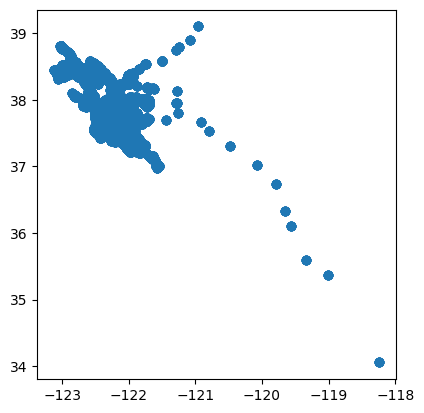

In [169]:
merge_3_gdf.plot()

In [ ]:
# try to dissolve by name_x (agency)
dissolve = merge_3_gdf.dissolve(by="name_x")

dissolve.sample(1)


### gdf sjoin
- ca_uza
- merge_3_gdf

In [170]:
ca_uza.geometry.head()


0    MULTIPOLYGON (((5832281.715 2190298.233, 5832309.915 2190274.978, 5832330.805 2190259.181, 58323...
1    MULTIPOLYGON (((6907414.411 1730693.234, 6907411.876 1730541.073, 6907411.301 1730376.923, 69074...
2    MULTIPOLYGON (((6563668.520 1883519.848, 6563814.932 1883432.154, 6563856.981 1883408.138, 65639...
3    MULTIPOLYGON (((6857282.649 1389487.501, 6857315.047 1389443.034, 6857317.849 1389439.420, 68573...
4    MULTIPOLYGON (((6816820.807 1797363.027, 6816953.077 1797363.043, 6817215.487 1797363.785, 68173...
Name: geometry, dtype: geometry

<AxesSubplot:>

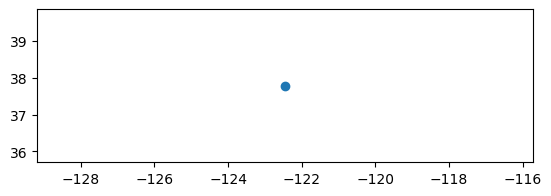

In [171]:
merge_3_gdf.head().plot()

In [172]:
# testing spatial joins 
test_sjoin = merge_3_gdf.sjoin(ca_uza, 
                          how="inner",
                          predicate="within"
                         )

test_sjoin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 0 entries
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   organization_name          0 non-null      object  
 1   organization_ntd_id        0 non-null      object  
 2   ntd_id                     0 non-null      object  
 3   stop_id                    0 non-null      object  
 4   feed_key                   0 non-null      object  
 5   base64_url                 0 non-null      object  
 6   schedule_gtfs_dataset_key  0 non-null      object  
 7   _gtfs_key                  0 non-null      object  
 8   geometry                   0 non-null      geometry
 9   index_right                0 non-null      int64   
 10  OBJECTID                   0 non-null      int64   
 11  UACE                       0 non-null      object  
 12  NAMELSAD                   0 non-null      object  
 13  POP                        0 non-null  

/tmp/ipykernel_780/1639144192.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  test_sjoin.plot()


<AxesSubplot:>

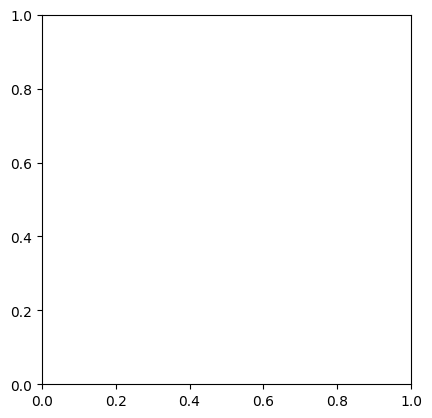

In [173]:
test_sjoin.plot()

In [174]:
# try overlay the 2 gdf

overlay = gpd.overlay(ca_uza, merge_3_gdf, how = "symmetric_difference")

overlay.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   OBJECTID                   58 non-null     float64 
 1   UACE                       58 non-null     object  
 2   NAMELSAD                   58 non-null     object  
 3   POP                        58 non-null     float64 
 4   AREALANDSQMI               58 non-null     float64 
 5   AREAWATERSQMI              57 non-null     float64 
 6   POPDEN                     58 non-null     float64 
 7   Shape__Area                58 non-null     float64 
 8   Shape__Length              58 non-null     float64 
 9   organization_name          0 non-null      object  
 10  organization_ntd_id        0 non-null      object  
 11  ntd_id                     0 non-null      object  
 12  stop_id                    0 non-null      object  
 13  feed_key                   0 

/tmp/ipykernel_780/1804472129.py:3: UserWarning: `keep_geom_type=True` in overlay resulted in 175174 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  overlay = gpd.overlay(ca_uza, merge_3_gdf, how = "symmetric_difference")


# Tiffany Suggestion
This crosswalk you use is ntd_id to RTPA. You can combine that with several warehouse tables:
- `dim_organizations` and `dim_gtfs_datasets` and `dim_provider_gtfs_data`

- since the above is a fairly complicated traversal, in `shared_utils`, there's a function that wraps this and gets you from a starting poitn of  a `schedule_gtfs_dataset_key` (operator) to `ntd_id` . It is used and created here.
- Operators (based on GTFS schedule) are subject to a date. If you know which date you want, you can use the crosswalk created and saved out here in gtfs_analytics_data.yml find the GCS path. This will get you the operator's `schedule_gtfs_dataset_key` + `ntd_id` + other ntd columns and you can connect that to your ntd_id - RTPA crosswalk.


---

## Area 3 - Volunteer Reporters
>E: The third area is that I noticed that it was mentioned in Section H that voluntary reports may help a state receive more money. Given this helpful piece of information, I had 3 follow-up ideas. 
>1. Can we figure out how it helps increase funding by being a voluntary reporter 
>2. Can we do an audit to see which agencies aren’t reporters that maybe could be and 
>3. What monetary benefit could be gained if we helped these agencies become voluntary reporters.

>K: would auditing this entail simply looking at organizations that don’t have an NTD ID? Or something else?

>E: Yes, I think we would look at all transit agencies in the transit database that operate fixed route service that don’t appear to have an NTD ID and are not present in NTD data.

In [ ]:
# dim orgs
dim_orgs = (tbls.mart_transit_database.dim_organizations()
                    >> filter(_._is_current == True,
                              _.ntd_id.isna(),
                              _.public_currently_operating_fixed_route == True
                             )
                    >> collect()
                   )

keep_cols_2 =[
    "key",
    "source_record_id",
    "name",
    "organization_type",
    "caltrans_district",
    "reporting_category",
    "is_public_entity",
    "ntd_id",
    "public_currently_operating_fixed_route",  
]

dim_orgs =dim_orgs[keep_cols_2]

#dim_orgs.info()